# 531 Lec 8 - Figure composition and formats

Lecture learning goals

By the end of the lecture you will be able to:

1. Layout plots in panels of a figure grid.
2. Save figures outside the notebook.
3. Understand figure formats in the notebook.
4. Retrieve info on further topics online.

## Required readings

This lecture's reading is from Fundamentals of Data Visualization.

- [Section 29 on how to tell a story with data](https://clauswilke.com/dataviz/telling-a-story.html). Telling a story with figures/data is a crucial skills to have and it will be part of this week's lab. The only reason I am not covering this in lecture is because I think this section already says it pretty much perfectly and I don't have much to add.

Table of Contents

You can view the ToC by opening this in your local Jupyter Lab,
and downloading the ToC extension
by going to the Extension Manager tab in the left sidebar, searching for "toc", and clicking "install"
(I posted [a video about this on slack](https://ubc-mds.slack.com/archives/C24GEJS11/p1599940203406600) if you can't find the extension).

---

In [1]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt
import pandas as pd

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

# Load the R cell magic
%load_ext rpy2.ipython

## 1. Figure composition (altair)


Let's create two figures to layout together.
The titles here are a bit redundant,
they're just mean to facilitate spotting which figure goes where 
in the multi-panel figure.

In [2]:
import altair as alt
from vega_datasets import data

cars = data.cars()

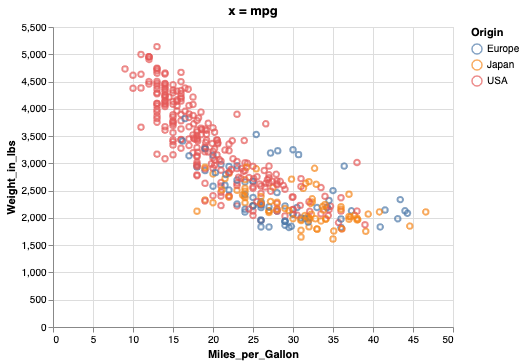

In [3]:
mpg_weight = alt.Chart(cars, title='x = mpg').mark_point().encode(
    x=alt.X('Miles_per_Gallon'),
    y=alt.Y('Weight_in_lbs'),
    color='Origin')
mpg_weight

If a variable is shared between two figures,
it is a good idea to have it on the same axis.
This makes it easier to compare the relationship
with the previous plot.

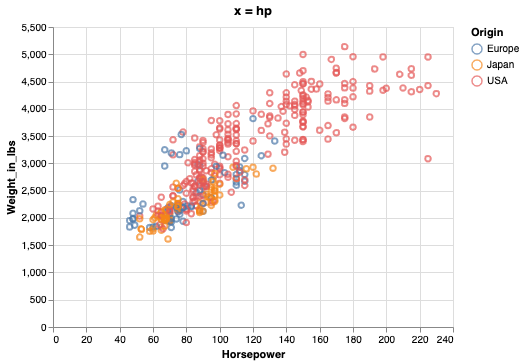

In [4]:
hp_weight = alt.Chart(cars, title='x = hp').mark_point().encode(
    x=alt.X('Horsepower'),
    y=alt.Y('Weight_in_lbs'),
    color='Origin')
hp_weight

#### `&` - vertical
To concatenate plots vertically,
we can use the ampersand operator.

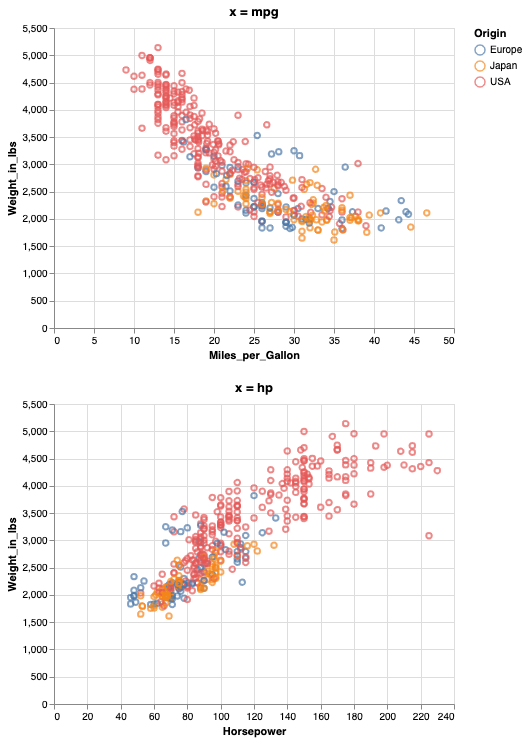

In [5]:
mpg_weight & hp_weight

#### `|` horizontally
To concatenate horizontally,
we use the pipe operator.

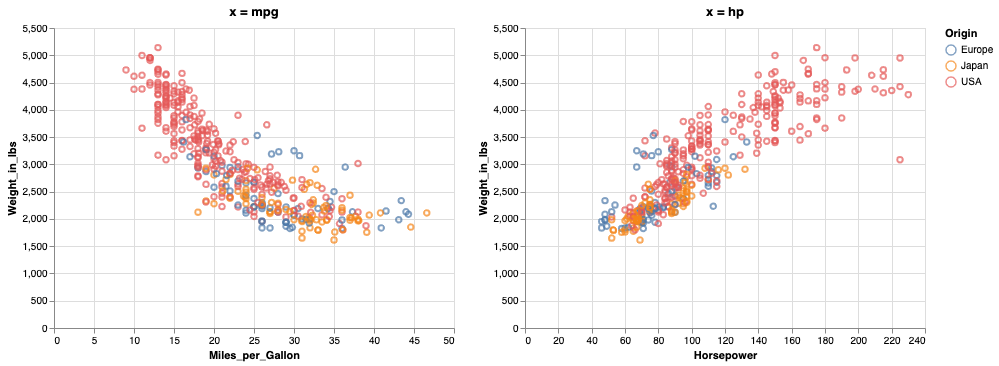

In [6]:
mpg_weight | hp_weight

#### overall title
To add an overall title to the figure,
we can use the `properties` method.
We need to surround the plots with a parentheis
to show that we are using `properties` of the composed figures
rather than just `hp_weight` one.

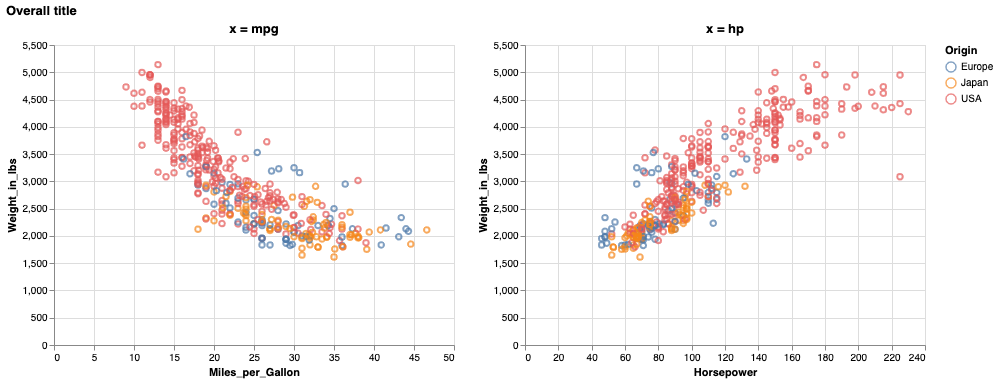

In [7]:
(mpg_weight | hp_weight).properties(title='Overall title')

In addition to `&` and `|`,
we could use the functions `vconcat` and `hconcat`.
You can use what you find the most convenient,
this is how to add a title with one of those functions.

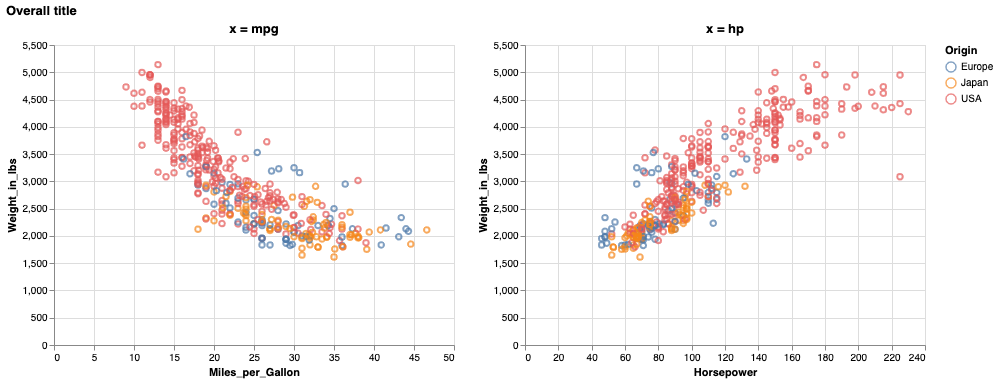

In [8]:
alt.hconcat(mpg_weight, hp_weight, title='Overall title')

We can also build up a figure with varying sizes 
for the different panels,
e.g. adding marginal distribution plots to a scatter plot.

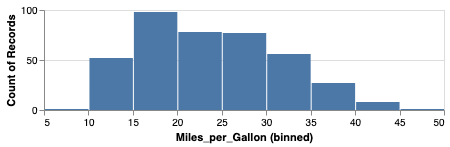

In [9]:
mpg_hist = alt.Chart(cars).mark_bar().encode(
    alt.X('Miles_per_Gallon', bin=True),
    y='count()').properties(height=100)
mpg_hist

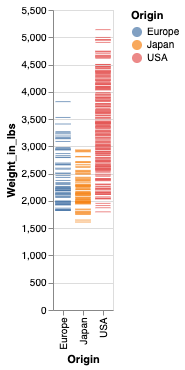

In [10]:
weight_ticks = alt.Chart(cars).mark_tick().encode( 
    x='Origin',
    y='Weight_in_lbs',
    color='Origin')
weight_ticks

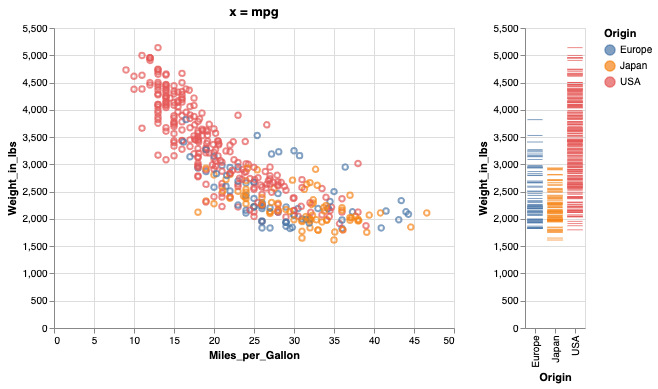

In [11]:
mpg_weight | weight_ticks

Just adding operations after each other can lead to the wrong grouping of the panels in the figure.

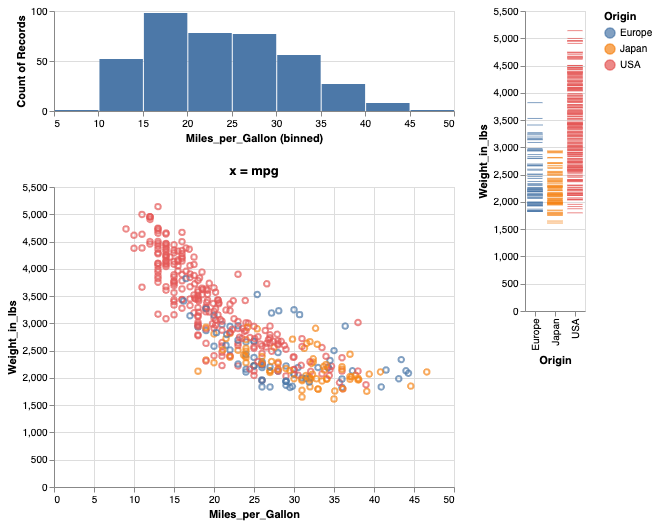

In [12]:
mpg_hist & mpg_weight | weight_ticks

Adding parenthesis can indicate how to group the different panels.

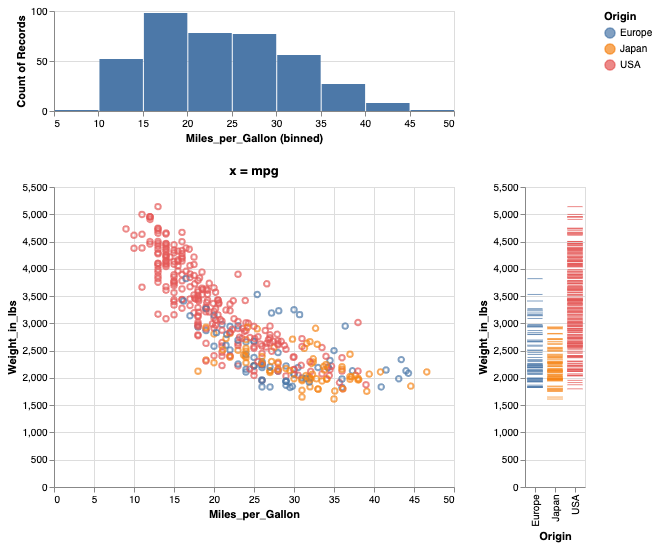

In [13]:
mpg_hist & (mpg_weight | weight_ticks)

## 2. Saving figures

Saving as HTML ensures that any interactive features are still present in the saved file.

In [14]:
combo = mpg_hist & (mpg_weight | weight_ticks)
combo.save('combo.html')

It is also possible to save as non-interactive formats 
such as png, svg, and pdf.
The png and pdf formats can be a bit tricky to getto work correctly,
as they depend on other packages.
Installation for these should have been taken care of via installing `altair_saver`,
which was in the environment file,
but there are [additional instruction in the github repo](https://github.com/altair-viz/altair_saver/#additional-requirements) in case that didn't work.
I find that svg works most of the time even when there are issues with the other two.

In [15]:
combo.save('combo.png')

TypeError: Cannot read property 'getContext' of null
    at resize (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3377:26)
    at CanvasRenderer.prototype$6.resize (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3427:5)
    at CanvasRenderer.prototype$4.initialize (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:2989:17)
    at CanvasRenderer.prototype$6.initialize (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3422:28)
    at initializeRenderer (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-view/build/vega-view.js:630:8)
    at renderHeadless (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-view/build/vega-view.js:736:12)
    at processTicksAndRejections (internal/process/task_queues.js:93:5)
    at async View.renderToCanvas

The resolution/size of the saved image can be controlled via the `scale_factor` parameter.

In [16]:
combo.save('combo-hires.png', scale_factor=3)

TypeError: Cannot read property 'getContext' of null
    at resize (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3377:26)
    at CanvasRenderer.prototype$6.resize (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3427:5)
    at CanvasRenderer.prototype$4.initialize (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:2989:17)
    at CanvasRenderer.prototype$6.initialize (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3422:28)
    at initializeRenderer (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-view/build/vega-view.js:630:8)
    at renderHeadless (/Users/frank/opt/anaconda3/envs/531/lib/vega-cli/node_modules/vega-view/build/vega-view.js:736:12)
    at processTicksAndRejections (internal/process/task_queues.js:93:5)
    at async View.renderToCanvas

## 3. Figure composition (ggplot)

In [17]:
%%R
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



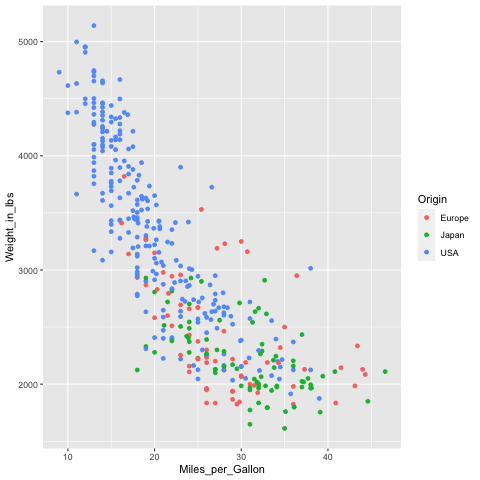

In [18]:
%%R -i cars
mpg_weight <- ggplot(cars) +
    aes(x = Miles_per_Gallon,
        y = Weight_in_lbs,
        color = Origin) +
    geom_point()
mpg_weight

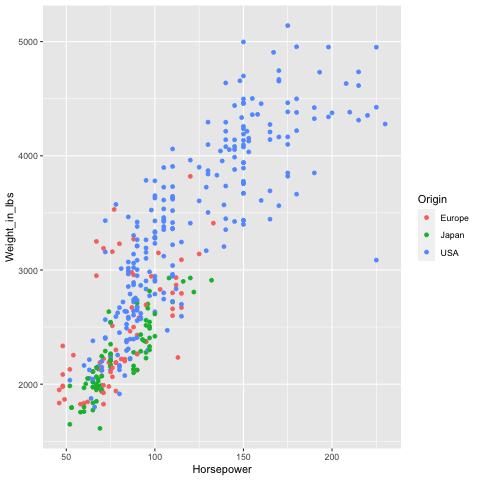

In [19]:
%%R -i cars
hp_weight <- ggplot(cars) +
    aes(x = Horsepower,
        y = Weight_in_lbs,
        color = Origin) +
    geom_point()
hp_weight

#### `plot_grid`
Laying out figures is not built into ggplot,
but the functionality is added in separate packages.
`patchwork` is similar to the operator-syntax we used with Altair,
and `cowplot` works similar to the concatenation functions in Altair.
Here I will be showing the latter,
but you're free to use either
("cow" are the author's initials,
Claus O Wilke, the same person who wrote Fundamentals of Data Visualization).

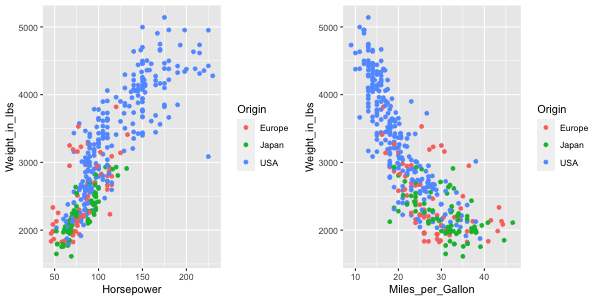

In [20]:
%%R -w 600 -h 300
library(cowplot)

plot_grid(hp_weight, mpg_weight)

#### `plot_grid(labels=c('A', 'B'))`
Panels can easily be labeled.

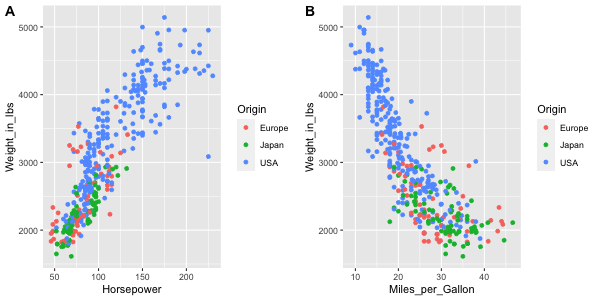

In [21]:
%%R -w 600 -h 300
plot_grid(hp_weight, mpg_weight, labels=c('A', 'B'))

And this can even be automated.

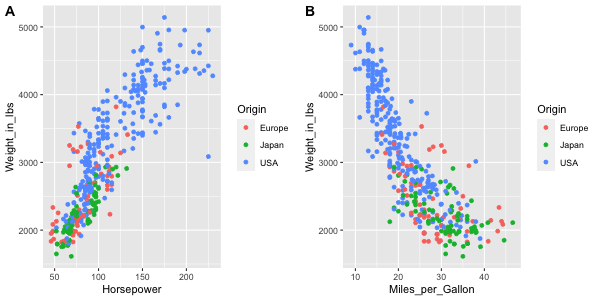

In [22]:
%%R -w 600 -h 300
plot_grid(hp_weight, mpg_weight, labels='AUTO')

Let's create a composite figure with marginal distribution plots.

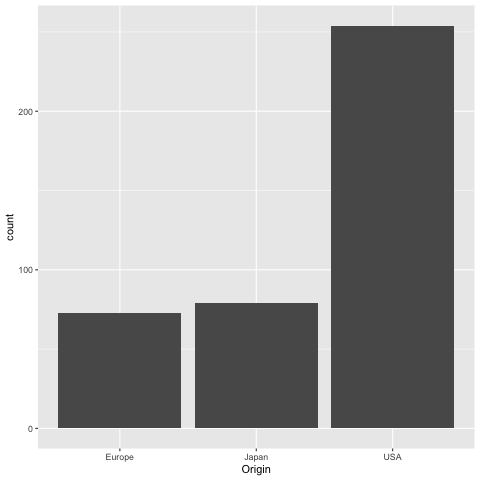

In [23]:
%%R
ggplot(cars) +
    aes(x = Origin) +
    geom_bar()

If we were to present this barplot as a communication firgure,
the bars should not be that wide.
It is more visually appealing with narrower bars.

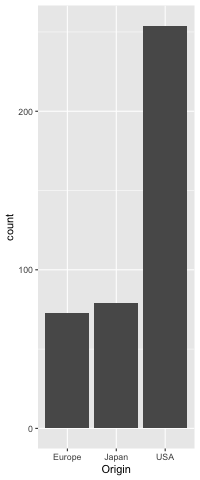

In [24]:
%%R -w 200
ggplot(cars) +
    aes(x = Origin) +
    geom_bar()

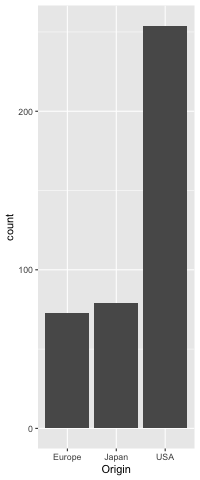

In [25]:
%%R -w 200
origin_count <- ggplot(cars) +
    aes(x = Origin) +
    geom_bar()
origin_count

To set the widths of figures in the composition plot,
we can use `rel_widths`.

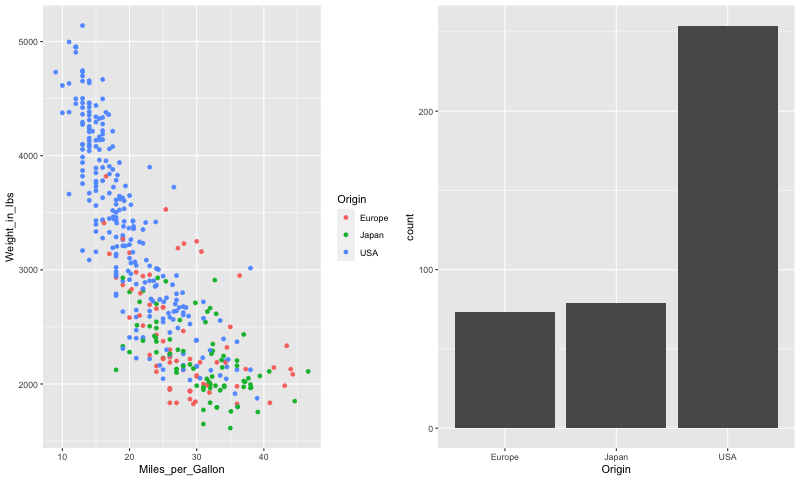

In [26]:
%%R -w 800
plot_grid(mpg_weight, origin_count)

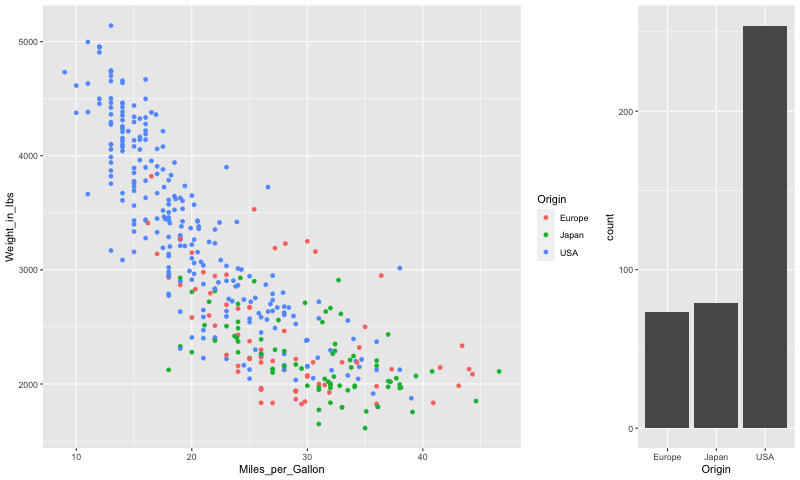

In [27]:
%%R -w 800
plot_grid(mpg_weight, origin_count, rel_widths=c(3, 1))

#### `plot_grid(rel_widths=c(1, 3))`
It is not that nice to see the legend between the plots,
so lets reorder them.

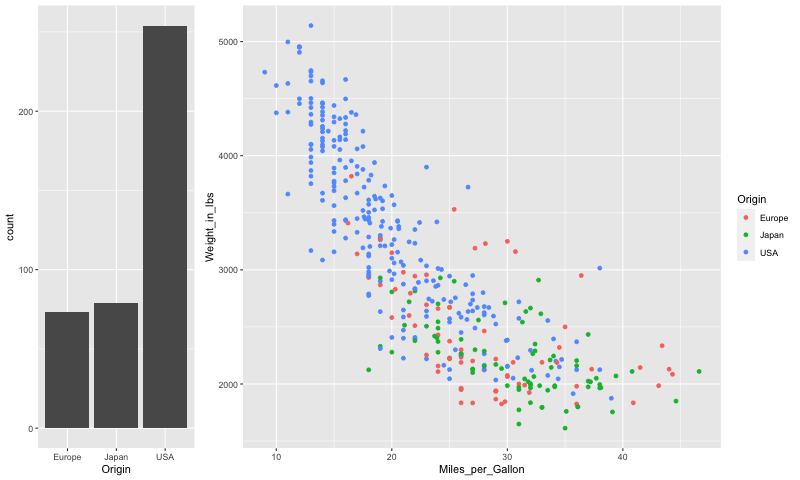

In [28]:
%%R -w 800
plot_grid(origin_count, mpg_weight, rel_widths=c(1, 3))

To concatenate vertically, 
we set the number of columns to 1.

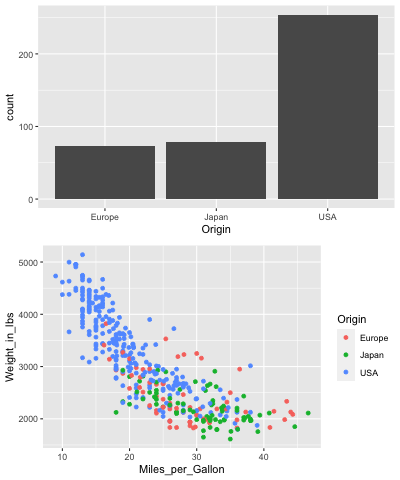

In [29]:
%%R -w 400
plot_grid(origin_count, mpg_weight, ncol=1)

Finally,
we can nest plot grids within each other.

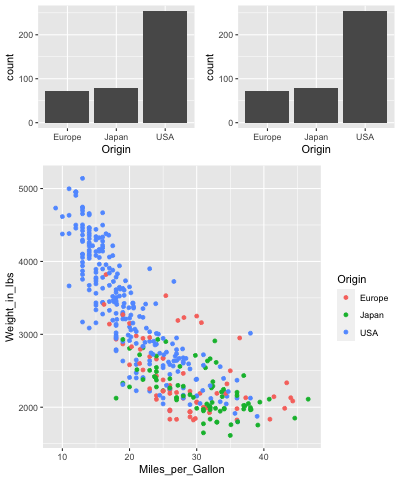

In [30]:
%%R -w 400
top_row <- plot_grid(origin_count, origin_count)
plot_grid(top_row, mpg_weight, ncol=1, rel_heights=c(1,2))

There are [some more tricks in the readme]( https://wilkelab.org/cowplot/articles/plot_grid.html),
including how to add a common title for the figures
via `ggdraw`.

## 4. Saving figures in ggplot

The `ggsave` functions saves the most recent plot to a file.

In [31]:
%%R
grid <- plot_grid(top_row, mpg_weight, ncol=1)
ggsave('grid.png')

R[write to console]: Saving 6.67 x 6.67 in image



You can also specify which figure to save.

In [32]:
%%R
ggsave('grid.png', grid)

R[write to console]: Saving 6.67 x 6.67 in image



Setting the dpi controls the resolution of the saved figure.

In [33]:
%%R
grid <- plot_grid(top_row, mpg_weight, ncol=1)
ggsave('grid2.png', dpi=96)

R[write to console]: Saving 6.67 x 6.67 in image



You can save to PDF and SVG as well.

In [34]:
%%R
grid <- plot_grid(top_row, mpg_weight, ncol=1)
ggsave('grid2.pdf')

R[write to console]: Saving 6.67 x 6.67 in image

